# (Ford GoBike System Data)
## by (Abdulhamead almania)


##### The Data(Ford GoBike dataset) Come From (https://www.lyft.com/bikes/bay-wheels) And The Main Goal To Find The Relationship Between Labels To Improve The Profit, In This Project We Will Tray To Find Way To Attracting And Retaining New Clients

##### Database : 

###### The Dataset include a 2.5M rows and 10k unique pike for 11 month from 1 - 11, 330 days in 2019,The Dataset has a Like 350 unique station, The Dataset has 14 columns Shown below:


duration_sec

start_time

end_time

start_station_id

start_station_name

start_station_latitude

start_station_longitude

end_station_id

end_station_name

end_station_latitude

end_station_longitude

bike_id

user_type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

bike_share_for_all_trip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import seaborn as sns

In [3]:
### reading the data :

## code : 

df_clean = pd.read_csv('final_data.csv')

## The start and end times of the trip

> Here We Can See The Rush Hours Has Most Trip From 7-10 and 15-20,It May Be Because It Is Time To Work In These Areas,Of Course, We Only Notice A Very Slight Difference Between The Start And End Times Of The Trip.

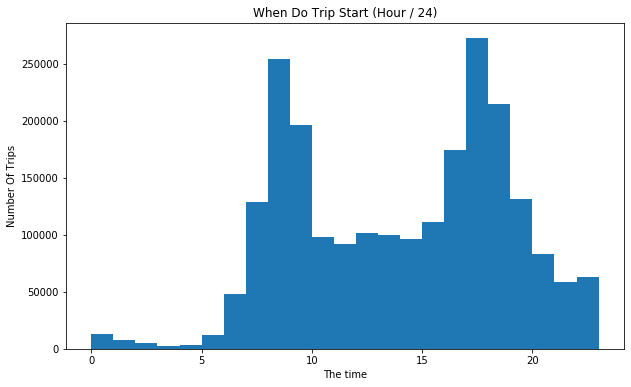

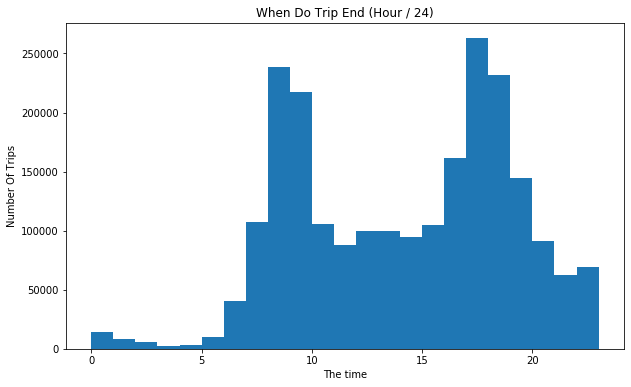

In [4]:
binsize = 1
bins = np.arange(0, df_clean['start_time_hour'].max()+binsize, binsize)
plt.figure(figsize=[10, 6])#SET FIGURE SIZE
plt.hist(data = df_clean, x = 'start_time_hour', bins = bins)
plt.xlabel('The time')#SET X LABEL
plt.title("When Do Trip Start (Hour / 24)")#SET TITLE 
plt.ylabel('Number Of Trips')#SET Y LABEL
plt.show()
#######
bins = np.arange(0, df_clean['end_time_hour'].max()+binsize, binsize)
plt.figure(figsize=[10, 6])#SET FIGURE SIZE
plt.hist(data = df_clean, x = 'end_time_hour', bins = bins)
plt.xlabel('The time')#SET X LABEL
plt.title("When Do Trip End (Hour / 24)")#SET TITLE
plt.ylabel('Number Of Trips')#SET Y LABEL
plt.show();

## Bike Share For All Trip
> The (Bike Share For All Trip) Is A Offer All Residents Of The Bay Area An Affordable, Accessible, And Fun new Transportation Option. Bike Share For All Provides A One-Time $5 Annual Membership For Qualifying Residents, But a Few Customers In This Subscription ,Why ? Fate Is Due To The Nature Of This Service Or It Is A New Service

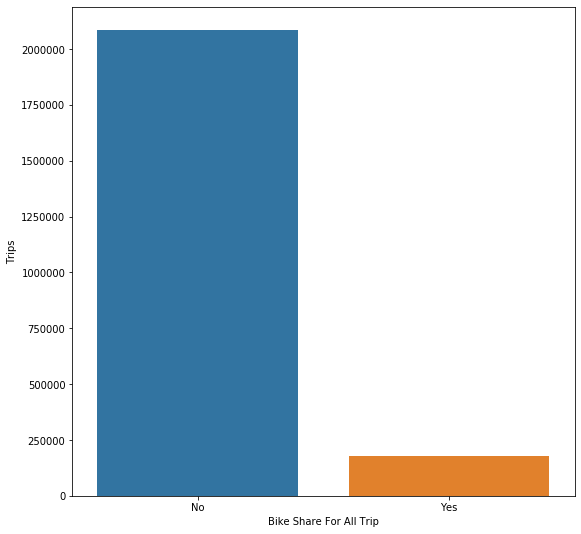

In [26]:
plt.figure(figsize = [9, 9])#SET FIGURE SIZE
sb.countplot(data=df_clean,x='bike_share_for_all_trip')
plt.xlabel('Bike Share For All Trip')#SET X LABEL
plt.ylabel('Trips')#SET Y LABEL
plt.show();

In [18]:
# list of days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# change weekday variable to ordered categorical variable
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'],
                                              categories=day_order,
                                              ordered = True)

## The most used days of service (GoBike)
> We Can See In Weekend(Sunday and Saturday) The Trip is Going Down, There May Be A Solution To Increasing The Number Of Trips, Such As Placing A Special Weekend Discount Or A Special Offer To Get People Excited.

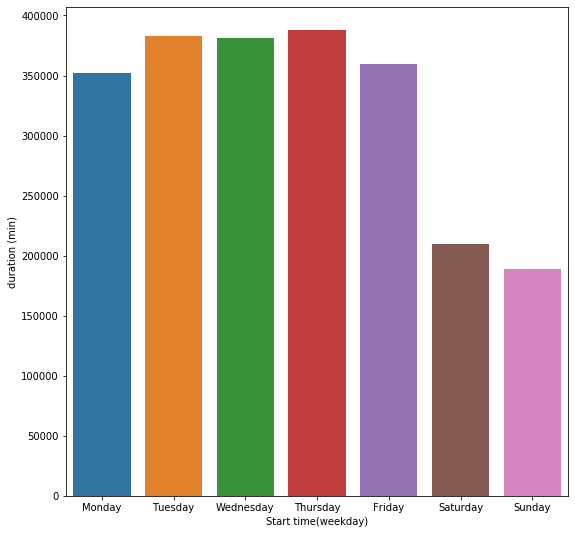

In [27]:
plt.figure(figsize = [9, 9])#SET FIGURE SIZE
sb.countplot(data=df_clean,x='start_time_weekday')
plt.xlabel('Start time(weekday)')#SET X LABEL
plt.ylabel('duration (min)')#SET Y LABEL
plt.show();

## Most used service in average duration min(GoBike)
> We Can See In Sunday And Saturday They had The Most Late To Start (But In Previous Graphic is Has A The Lowest Number Of Trips)


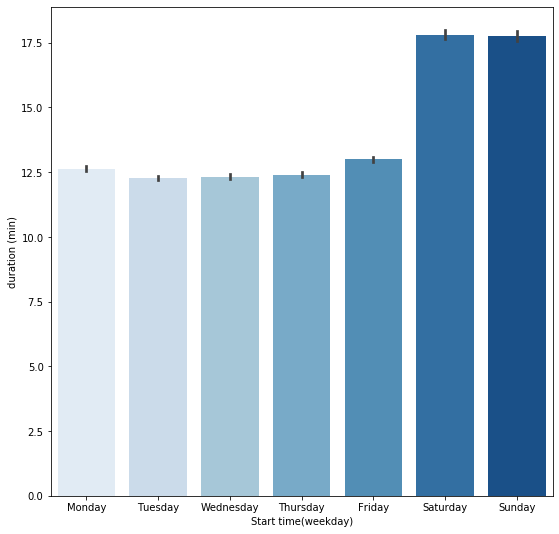

In [22]:
plt.figure(figsize = [9, 9])#SET FIGURE SIZE
sb.barplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', palette = 'Blues')
plt.xlabel('Start time(weekday)')#SET X LABEL
plt.ylabel('duration (min)')#SET Y LABEL
plt.show();

## The most frequently used month for (GoBike)
> Almost Every Month Has The Same Average Duration Of Time


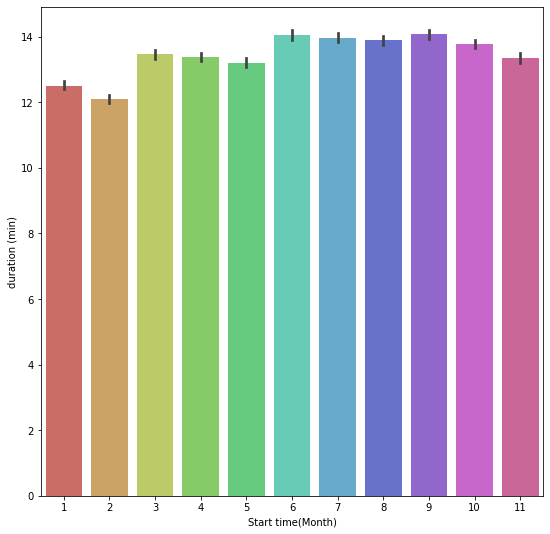

In [30]:
plt.figure(figsize = [9, 9])#SET FIGURE SIZE
sb.barplot(data = df_clean, x = 'start_time_month', y = 'duration_min', palette = 'hls')
plt.xlabel('Start time(Month)')#SET X LABEL
plt.ylabel('duration (min)')#SET Y LABEL
plt.show();

## All time Trip Duration In 2019

> We Can See After 2019-4 It Has Huge Decreased For Number Of Trips

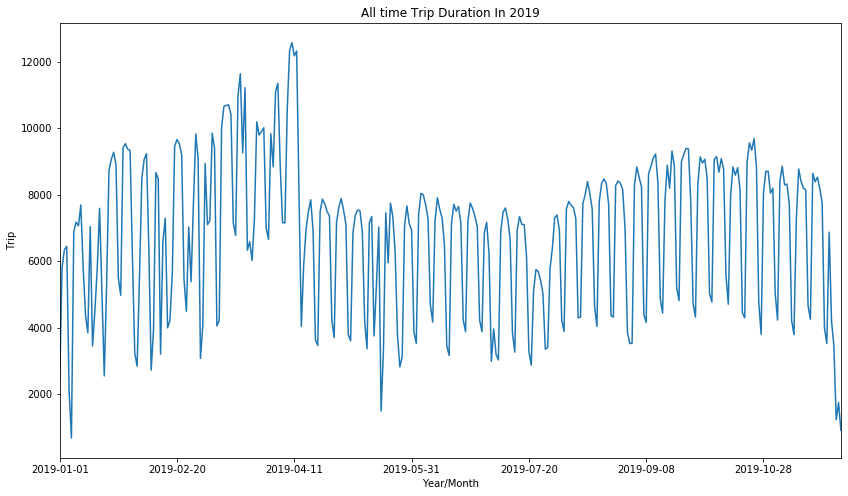

In [24]:
df_clean.groupby('start_time_date').agg({'bike_id':'count'}).plot(legend=False, figsize=(14,8))
plt.title('All time Trip Duration In 2019')#SET A TITLE
plt.xlabel('Year/Month')#SET X LABEL
#SET Y LABEL
plt.ylabel('Trip');

## Duration by customer type:

>We Can See The Customer They Take Duration More Than Subscriber, We Can See In Sunday And Saturday They had The Longest Time For The Trip.

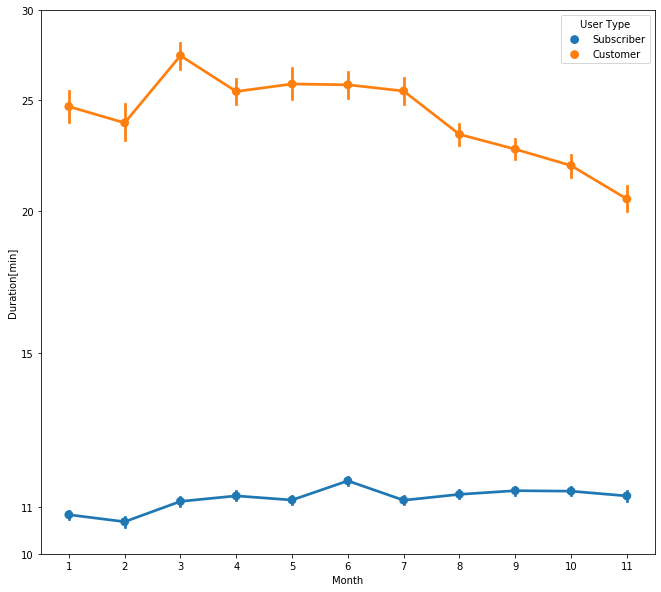

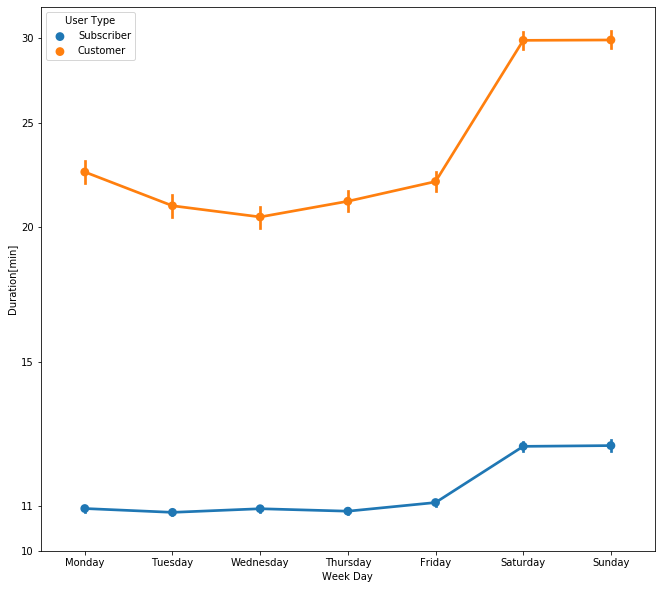

In [29]:
plt.figure(figsize = [11,10])#SET A FIGURE SIZE

ax = sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type')

plt.yscale('log')
plt.ylabel('Duration[min]')#SET Y LABEL
plt.xlabel('Month')#SET X LABEL
ax.set_yticklabels([], minor = True)
plt.legend(title='User Type')#SET A LEGEND

plt.yticks([10, 11,15,20,25,30],['10', '11','15','20','25','30'])#SET Y TICKS
plt.show();
###
plt.figure(figsize = [11,10])#SET A FIGURE SIZE
ax = sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type')
plt.yscale('log')
plt.ylabel('Duration[min]')#SET Y LABEL
plt.xlabel('Week Day')#SET X LABEL
ax.set_yticklabels([], minor = True)
plt.legend(title='User Type')#SET A LEGEND
plt.yticks([10, 11,15,20,25,30],['10', '11','15','20','25','30'])#SET A Y TICKS

plt.show();

## Trip Duration(min) Against Month and User Type
> We Can See The Trips Who Take The Special Offer They Take Less Than Duration  Each Month 

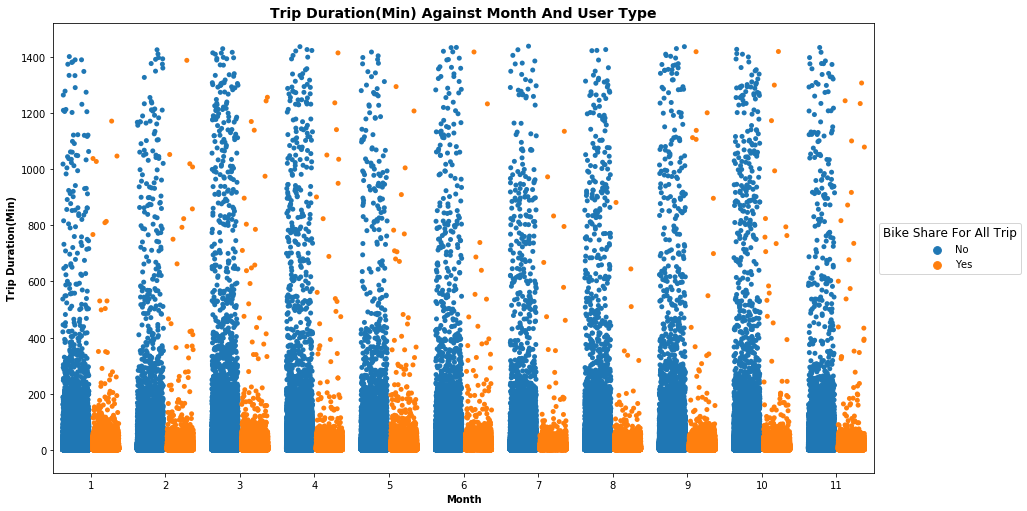

In [25]:
plt.figure(figsize=[14.70,8.27])#SET A FIGURE SIZE
sns.stripplot(data = df_clean , hue = 'bike_share_for_all_trip',
           x = 'start_time_month' , y= 'duration_min' ,jitter = 0.35 , dodge = True)
plt.title('Trip Duration(min) Against Month and User Type'.title(),
         fontsize = 14 , weight = "bold")#SET A TITLE
plt.xlabel('Month'.title(),fontsize = 10 , weight = "bold")#SET X LABEL
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Bike Share For All Trip", title_fontsize = 12);#SET  A LEGEND
#SET Y LABEL
plt.ylabel('Trip Duration(min)'.title(),fontsize = 10 , weight = "bold" );